<a href="https://colab.research.google.com/github/mausumiR/deeplearning/blob/main/CIFAR-10ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement 8 

# **Import Libraries**

In [ ]:
%tensorflow_version 2.2
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers

from keras.optimizers import Adam
from keras.optimizers import SGD

import random
import numpy as np
!pip install utils
import utils
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import pandas  as pd
import time

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.2`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of numbers will appear every time. 
tf.random.set_seed(42)  # sets the graph-level random seed

# **Loading Data**

In [ ]:
from tensorflow.keras.datasets import cifar10
(Xtrain, Ytrain) , (Xtest, Ytest) = cifar10.load_data()
(X_train, Y_train) , (X_test, Y_test) = cifar10.load_data()
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)



170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


# **2 . Data Visualization and augmentation**

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
Original Data:


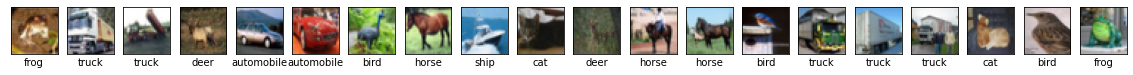

augmentation horizontal_flip


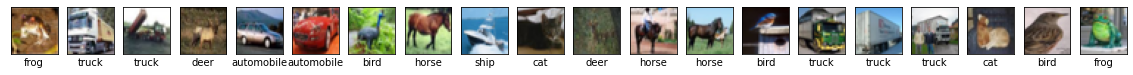

augmentation : width_shift


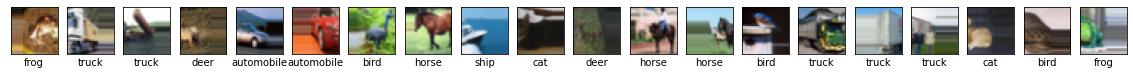

augmentation : rotation


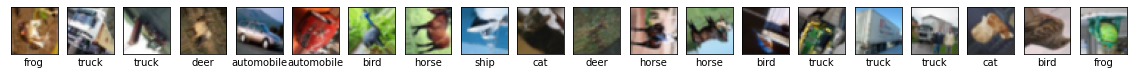

augmentation : hight_shift


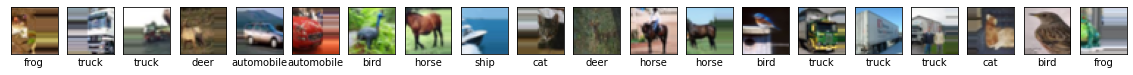

(50000, 3072)
(10000, 3072)
(50000, 10)
(10000, 10)


In [ ]:
# a)Plot at least two samples from each class of the dataset (use matplotlib/seaborn/any other library).
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
# utility function to visualize the data
def visualize_data(images, categories, class_names):
    fig = plt.figure(figsize=(20, 5))
    fig.patch.set_facecolor('white')
    for i in range(1 * 20):
        plt.subplot(1, 20, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i])
        class_index = categories[i].argmax()
        plt.xlabel(class_names[class_index])
    plt.show()

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(cifar_classes)


Xtrain = Xtrain / 255.0
Ytrain = to_categorical(Ytrain, num_classes)

Xtest = Xtest / 255.0
Ytest = to_categorical(Ytest, num_classes)
print(Ytest)
print("Original Data:")
visualize_data(Xtrain, Ytrain, cifar_classes)

# b)Apply rotation and height shift augmentation (horizontal_flip, width_shift_range) to 
#the dataset separately. Print the augmented image and the original image for each 
#class and each augmentation.

#Horizontal Flip
datagen_horizontal = ImageDataGenerator(
    horizontal_flip=True
    )
datagen_horizontal.fit(Xtrain)
it = datagen_horizontal.flow(Xtrain, Ytrain, shuffle=False)
batch_images, batch_labels = next(it)
print("augmentation horizontal_flip")
visualize_data(batch_images, batch_labels, cifar_classes)

#width_shift_range
datagen_width_shift = ImageDataGenerator(
    width_shift_range=0.5
    )
datagen_width_shift.fit(Xtrain)
it = datagen_width_shift.flow(Xtrain, Ytrain, shuffle=False)
batch_images, batch_labels = next(it)
print("augmentation : width_shift")
visualize_data(batch_images, batch_labels, cifar_classes)

#Rotation
datagen_rotation = ImageDataGenerator(
    rotation_range=359
    )
datagen_rotation.fit(Xtrain)
it = datagen_rotation.flow(Xtrain, Ytrain, shuffle=False)
batch_images, batch_labels = next(it)
print("augmentation : rotation")
visualize_data(batch_images, batch_labels, cifar_classes)

#Hight shift
datagen_hight_shift = ImageDataGenerator(
    width_shift_range=0.5
    )
datagen_hight_shift.fit(Xtrain)
it = datagen_hight_shift.flow(Xtrain, Ytrain, shuffle=False)
batch_images, batch_labels = next(it)
print("augmentation : hight_shift")
visualize_data(batch_images, batch_labels, cifar_classes)



Xtrain = Xtrain.reshape((50000, 32*32*3))    
Xtrain = Xtrain.astype('float32')/255     

Xtest = Xtest.reshape((10000, 32*32*3))     
Xtest = Xtest.astype('float32')/255 
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

# **3. Model Building**

In [ ]:
# Create a model object
# a) Sequential Model layers- Use AT LEAST 3 hidden layers with appropriate input for 
from tensorflow.keras import regularizers
dnnModel = models.Sequential()

# Layer 1 = input layer
# specify the input size in the first layer.
dnnModel.add(layers.Dense(1024, activation='relu', input_shape=(3072,)))

# Layer 2 = hidden layer  with Regularizers
dnnModel.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)) )
#dnnModel.add(layers.Dropout(0.5))
# Layer 3 = hidden layer 
dnnModel.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)) )
#dnnModel.add(layers.Dropout(0.5))
dnnModel.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)) )
#dnnModel.add(layers.Dropout(0.5))


# Layer 4 = output layer
dnnModel.add(layers.Dense(10, activation='softmax'))

dnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 4,201,994
Trainable params: 4,201,994
Non-trainable params: 0
_________________________________________________________________


# **4. Model Compilation**

In [ ]:
# a. Compile the model with the appropriate loss function.
# b. Use an appropriate optimizer. Give reasons for the choice of learning rate and its 
# value.
# c. Use accuracy as metric.
#from keras.optimizers import Adam
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#adam = Adam(lr=.1)
dnnModel.compile( optimizer = 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'] )

# **5. Model Training**

In [ ]:
# train the model

start = time.time()
h = dnnModel.fit( Xtrain, Ytrain, epochs=100, validation_split=.2, batch_size=64)
#Print the total time taken for training.
print(f"Total training time: {(time.time() - start)/60.} minutes")
print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy ', h.history['accuracy'][-1])

Epoch 1/100
625/625 [==============================] - 6s 4ms/step - loss: 2.1684 - accuracy: 0.1793 - val_loss: 2.0809 - val_accuracy: 0.1906
Epoch 2/100
625/625 [==============================] - 2s 4ms/step - loss: 2.0488 - accuracy: 0.2004 - val_loss: 2.0239 - val_accuracy: 0.2089
Epoch 3/100
625/625 [==============================] - 2s 4ms/step - loss: 1.9620 - accuracy: 0.2481 - val_loss: 1.9567 - val_accuracy: 0.2629
Epoch 4/100
625/625 [==============================] - 2s 4ms/step - loss: 1.9022 - accuracy: 0.2818 - val_loss: 1.8901 - val_accuracy: 0.2829
Epoch 5/100
625/625 [==============================] - 3s 4ms/step - loss: 1.8780 - accuracy: 0.2939 - val_loss: 1.8763 - val_accuracy: 0.2976
Epoch 6/100
625/625 [==============================] - 2s 4ms/step - loss: 1.8517 - accuracy: 0.3013 - val_loss: 1.8743 - val_accuracy: 0.2944
Epoch 7/100
625/625 [==============================] - 2s 4ms/step - loss: 1.8369 - accuracy: 0.3095 - val_loss: 1.8327 - val_accuracy: 0.3098

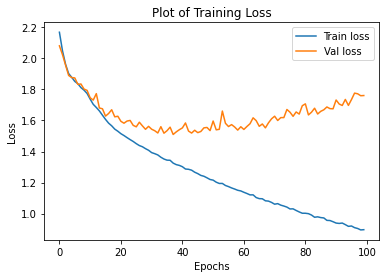

In [ ]:
#Plot Training loss

plt.plot(h.history['loss'], label='Train loss')
plt.plot(h.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

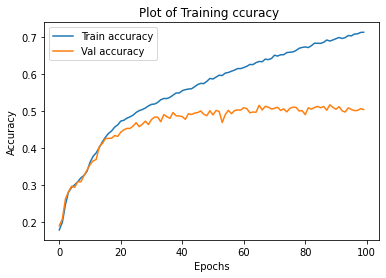

In [ ]:
#Accuracy History

plt.plot(h.history['accuracy'], label='Train accuracy')
plt.plot(h.history['val_accuracy'], label='Val accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Plot of Training ccuracy ')
plt.legend()
plt.show()

# **6. Model Evaluation**

313/313 [==============================] - 1s 3ms/step - loss: 1.7286 - accuracy: 0.5093
Testing loss 	 1.7285706996917725
Testing accuracy  0.5092999935150146
313/313 - 0s
Print confusion matrix ------
[[528  77  64  36  42   8  38  31  92  84]
 [ 34 681   9  26   9   1  28   9  39 164]
 [ 60  27 310 107 157  92 166  51  11  19]
 [ 11  27  57 317  52 173 229  52  22  60]
 [ 36  15 105  59 421  46 194  78  17  29]
 [ 13   7  51 243  66 389 128  59  12  32]
 [  5  24  42  76  96  25 700   8   5  19]
 [ 33   8  37  60  89  82  48 546   4  93]
 [103 110  12  31  20  14  18  11 596  85]
 [ 29 216   5  42  17   5  16  32  33 605]]


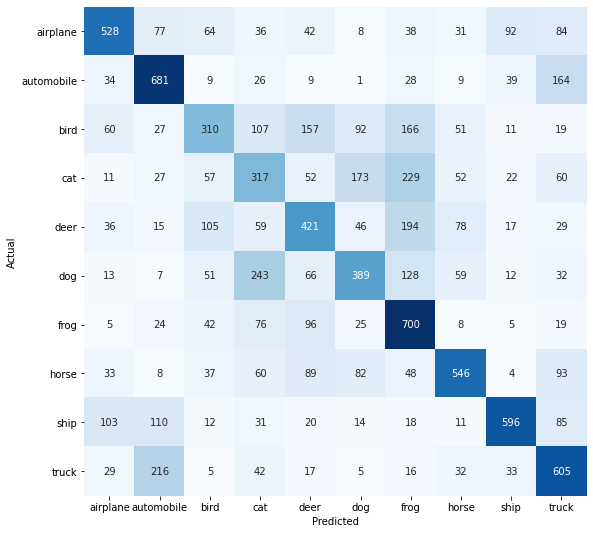

classification report -----
              precision    recall  f1-score   support

    airplane       0.62      0.53      0.57      1000
  automobile       0.57      0.68      0.62      1000
        bird       0.45      0.31      0.37      1000
         cat       0.32      0.32      0.32      1000
        deer       0.43      0.42      0.43      1000
         dog       0.47      0.39      0.42      1000
        frog       0.45      0.70      0.55      1000
       horse       0.62      0.55      0.58      1000
        ship       0.72      0.60      0.65      1000
       truck       0.51      0.60      0.55      1000

    accuracy                           0.51     10000
   macro avg       0.52      0.51      0.51     10000
weighted avg       0.52      0.51      0.51     10000

 Print the two most incorrectly classified images for each class in the test dataset.:


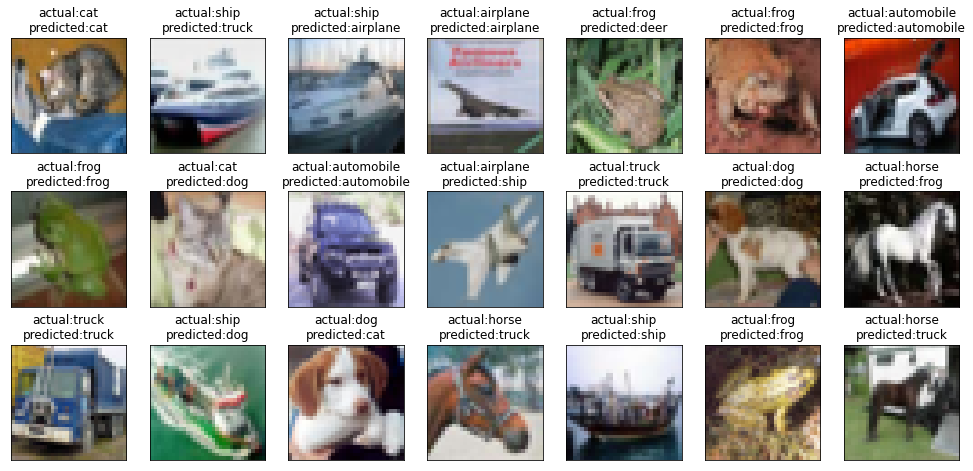

In [ ]:

testLoss, testAccuracy = dnnModel.evaluate( Xtest, Ytest)
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

# Confusion matrix result

y_pred = dnnModel.predict(Xtest, verbose=2)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(Ytest,axis=1),y_pred)

print("Print confusion matrix ------")
print(cm)

# Visualizing of confusion matrix
plt.figure(figsize=(9,9))
sn.heatmap(cm, cbar=False, xticklabels=cifar_classes, yticklabels=cifar_classes, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("classification report -----")
print(classification_report(np.argmax(Ytest,axis=1),y_pred,target_names=cifar_classes))

print(" Print the two most incorrectly classified images for each class in the test dataset.:")

y_test = Y_test.astype(int)
predictions = y_pred.astype(int)
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + cifar_classes[y_test[index][0]]+ '\n' 
                            + 'predicted:' + cifar_classes[predictions[index]])
        axes[i,j].imshow(X_test[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

# **1. Batch Size: Change the value of batch size in model training**

Epoch 1/100
313/313 [==============================] - 2s 5ms/step - loss: 0.8124 - accuracy: 0.7501 - val_loss: 1.7839 - val_accuracy: 0.5160
Epoch 2/100
313/313 [==============================] - 2s 5ms/step - loss: 0.8181 - accuracy: 0.7444 - val_loss: 1.8608 - val_accuracy: 0.5033
Epoch 3/100
313/313 [==============================] - 2s 5ms/step - loss: 0.8172 - accuracy: 0.7480 - val_loss: 1.8239 - val_accuracy: 0.5047
Epoch 4/100
313/313 [==============================] - 2s 5ms/step - loss: 0.8078 - accuracy: 0.7509 - val_loss: 1.8181 - val_accuracy: 0.5107
Epoch 5/100
313/313 [==============================] - 2s 5ms/step - loss: 0.8121 - accuracy: 0.7481 - val_loss: 1.8285 - val_accuracy: 0.5120
Epoch 6/100
313/313 [==============================] - 2s 5ms/step - loss: 0.8076 - accuracy: 0.7530 - val_loss: 1.8539 - val_accuracy: 0.5086
Epoch 7/100
313/313 [==============================] - 2s 5ms/step - loss: 0.8055 - accuracy: 0.7533 - val_loss: 1.8561 - val_accuracy: 0.5072

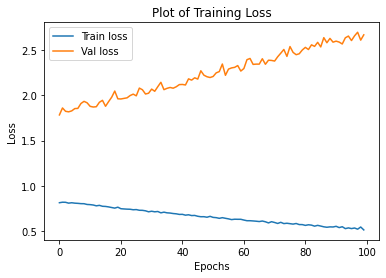

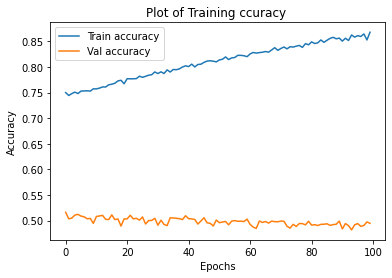

313/313 [==============================] - 1s 2ms/step - loss: 2.6087 - accuracy: 0.4896
Testing loss 	 2.608657121658325
Testing accuracy  0.4896000027656555
313/313 - 0s
Print confusion matrix ------
[[527  43  95  38  38  18  23  28 148  42]
 [ 53 576  14  45  12   4  37  10  94 155]
 [ 66  12 377 136 121  97 106  47  24  14]
 [ 16  13  67 363  53 204 143  51  42  48]
 [ 46   6 136 100 402  68 139  64  27  12]
 [ 13   5  64 273  67 393  66  69  22  28]
 [ 11  18  79 139  96  42 581   6  13  15]
 [ 43   5  52  76 114 115  31 481  11  72]
 [ 95  66  17  51  19  20  12  11 674  35]
 [ 41 182  11  63  13  15  19  45  89 522]]


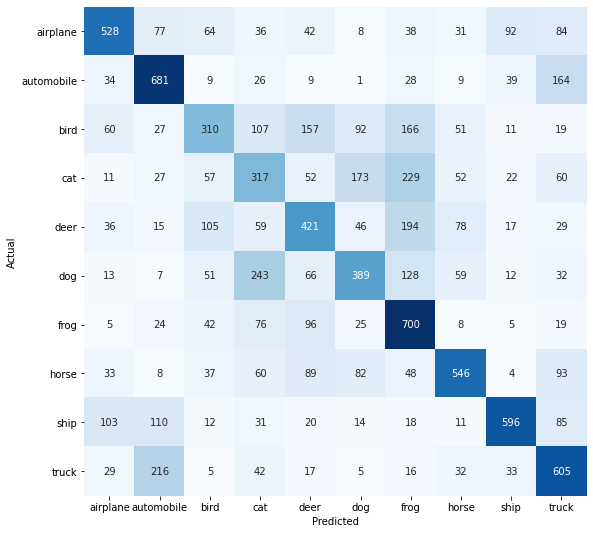

classification report -----
              precision    recall  f1-score   support

    airplane       0.58      0.53      0.55      1000
  automobile       0.62      0.58      0.60      1000
        bird       0.41      0.38      0.39      1000
         cat       0.28      0.36      0.32      1000
        deer       0.43      0.40      0.42      1000
         dog       0.40      0.39      0.40      1000
        frog       0.50      0.58      0.54      1000
       horse       0.59      0.48      0.53      1000
        ship       0.59      0.67      0.63      1000
       truck       0.55      0.52      0.54      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000

 Print the two most incorrectly classified images for each class in the test dataset.:


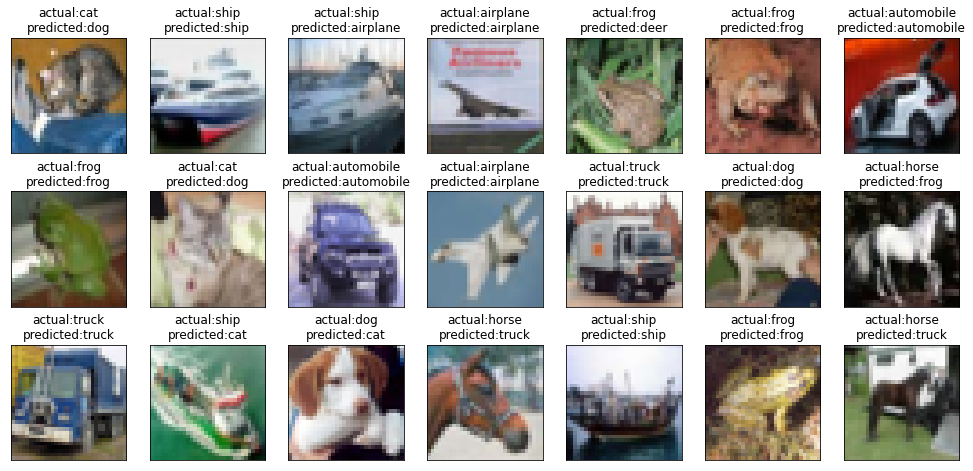

In [ ]:
#Batch size 128 
start = time.time()
h = dnnModel.fit( Xtrain, Ytrain, epochs=100, validation_split=.2, batch_size=128)
#Print the total time taken for training.
print(f"Total training time: {(time.time() - start)/60.} minutes")
print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy ', h.history['accuracy'][-1])

plt.plot(h.history['loss'], label='Train loss')
plt.plot(h.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

#Accuracy History

plt.plot(h.history['accuracy'], label='Train accuracy')
plt.plot(h.history['val_accuracy'], label='Val accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Plot of Training ccuracy ')
plt.legend()
plt.show()


testLoss, testAccuracy = dnnModel.evaluate( Xtest, Ytest)
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

# Confusion matrix result

y_pred = dnnModel.predict(Xtest, verbose=2)
y_pred = np.argmax(y_pred, axis=1)


print("Print confusion matrix ------")
print(confusion_matrix(np.argmax(Ytest,axis=1),y_pred))

# Visualizing of confusion matrix
plt.figure(figsize=(9,9))
sn.heatmap(cm, cbar=False, xticklabels=cifar_classes, yticklabels=cifar_classes, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("classification report -----")
print(classification_report(np.argmax(Ytest,axis=1),y_pred,target_names=cifar_classes))

print(" Print the two most incorrectly classified images for each class in the test dataset.:")

y_test = Y_test.astype(int)
predictions = y_pred.astype(int)
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + cifar_classes[y_test[index][0]]+ '\n' 
                            + 'predicted:' + cifar_classes[predictions[index]])
        axes[i,j].imshow(X_test[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()


# **2. Optimiser: Use a different optimizer with the appropriate LR value**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
625/625 [==============================] - 3s 4ms/step - loss: 2.5796 - accuracy: 0.1003 - val_loss: 2.4209 - val_accuracy: 0.1003
Epoch 2/100
625/625 [==============================] - 3s 4ms/step - loss: 2.4074 - accuracy: 0.1001 - val_loss: 2.3941 - val_accuracy: 0.1022
Epoch 3/100
625/625 [==============================] - 2s 3ms/step - loss: 2.3841 - accuracy: 0.0989 - val_loss: 2.3741 - val_accuracy: 0.0977
Epoch 4/100
625/625 [==============================] - 2s 3ms/step - loss: 2.3661 - accuracy: 0.0983 - val_loss: 2.3586 - val_accuracy: 0.1014
Epoch 5/100
625/625 [==============================] - 2s 4ms/step - loss: 2.3522 - accuracy: 0.1004 - val_loss: 2.3459 - val_accuracy: 0.1003
Epoch 6/100
625/625 [==============================] - 2s 3ms/step - loss: 2.3413 - accuracy: 0.0984 - val_loss: 2.3367 - val_accuracy: 0.1016
Epoch 7/100
625/625 [==============================] - 2s 3ms/step - loss: 2.3328 - accuracy: 0.0998 - val_loss: 2.3293 - val_accuracy: 0.0980

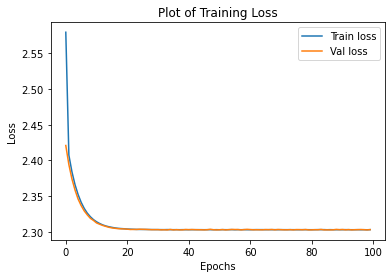

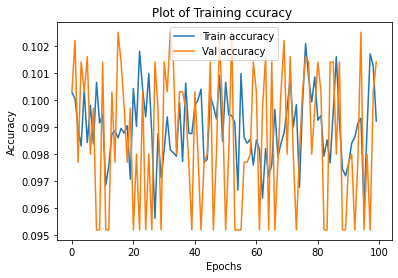

313/313 [==============================] - 1s 2ms/step - loss: 2.3029 - accuracy: 0.1000
Testing loss 	 2.3028998374938965
Testing accuracy  0.10000000149011612
313/313 - 0s
Print confusion matrix ------
[[1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]]


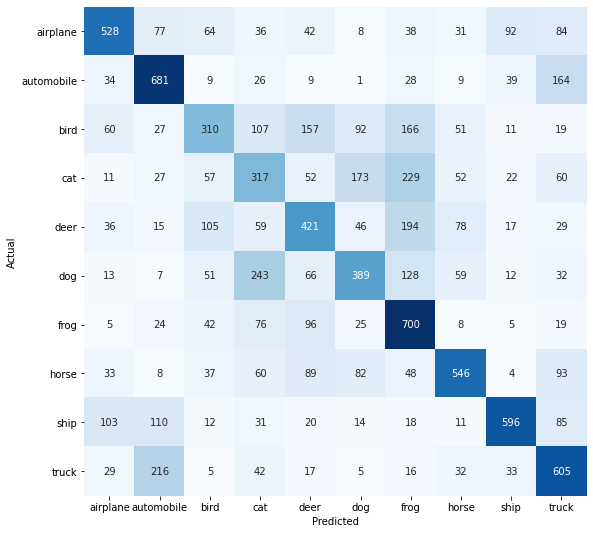

classification report -----
              precision    recall  f1-score   support

    airplane       0.10      1.00      0.18      1000
  automobile       0.00      0.00      0.00      1000
        bird       0.00      0.00      0.00      1000
         cat       0.00      0.00      0.00      1000
        deer       0.00      0.00      0.00      1000
         dog       0.00      0.00      0.00      1000
        frog       0.00      0.00      0.00      1000
       horse       0.00      0.00      0.00      1000
        ship       0.00      0.00      0.00      1000
       truck       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

 Print the two most incorrectly classified images for each class in the test dataset.:


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


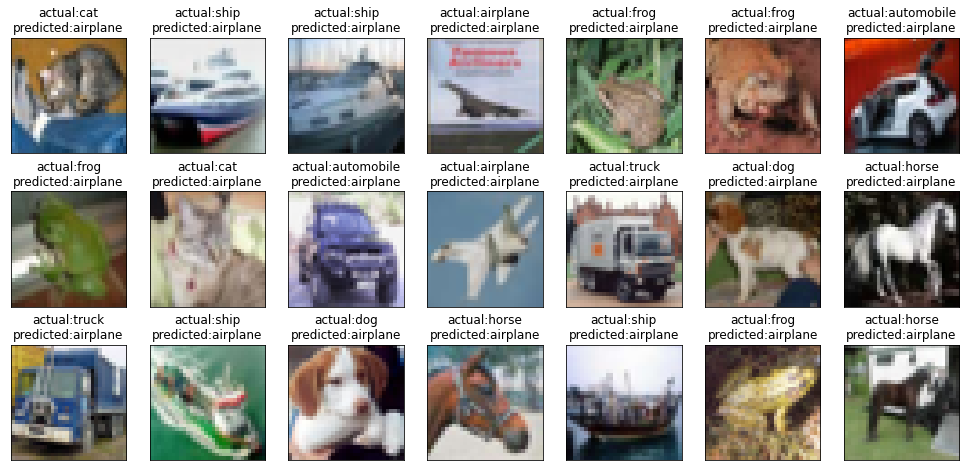

In [ ]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

dnnModel.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()
h = dnnModel.fit( Xtrain, Ytrain, epochs=100, validation_split=.2, batch_size=64)
#Print the total time taken for training.
print(f"Total training time: {(time.time() - start)/60.} minutes")
print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy ', h.history['accuracy'][-1])

plt.plot(h.history['loss'], label='Train loss')
plt.plot(h.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

#Accuracy History

plt.plot(h.history['accuracy'], label='Train accuracy')
plt.plot(h.history['val_accuracy'], label='Val accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Plot of Training ccuracy ')
plt.legend()
plt.show()


testLoss, testAccuracy = dnnModel.evaluate( Xtest, Ytest)
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

# Confusion matrix result

y_pred = dnnModel.predict(Xtest, verbose=2)
y_pred = np.argmax(y_pred, axis=1)


print("Print confusion matrix ------")
print(confusion_matrix(np.argmax(Ytest,axis=1),y_pred))

# Visualizing of confusion matrix
plt.figure(figsize=(9,9))
sn.heatmap(cm, cbar=False, xticklabels=cifar_classes, yticklabels=cifar_classes, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("classification report -----")
print(classification_report(np.argmax(Ytest,axis=1),y_pred,target_names=cifar_classes))

print(" Print the two most incorrectly classified images for each class in the test dataset.:")

y_test = Y_test.astype(int)
predictions = y_pred.astype(int)
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + cifar_classes[y_test[index][0]]+ '\n' 
                            + 'predicted:' + cifar_classes[predictions[index]])
        axes[i,j].imshow(X_test[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()
